In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

In [62]:
data = pd.read_csv('../Dataset Creation/synthetic_heart_attack_data_balanced.csv')

In [63]:
# Display dataset overview
print("Dataset Overview:")
print(tabulate(data.head(), headers="keys", tablefmt="pretty"))

Dataset Overview:
+---+-------------------+-------------------+-------------------+--------------------+-------------------+-----------------+---------------+------------+-------------------+
|   |     HR (BPM)      |     SpO2 (%)      |     PRV (ms)      |  Temperature (°C)  |     GSR (µS)      | MAX30102 Status | TMP117 Status | GSR Status | Heart Attack Risk |
+---+-------------------+-------------------+-------------------+--------------------+-------------------+-----------------+---------------+------------+-------------------+
| 0 |        0.0        |        0.0        |        0.0        | 36.201473052594096 | 3.549573800533356 |     Offline     |    Online     |   Online   |        No         |
| 1 |        0.0        |        0.0        |        0.0        | 37.86398235363129  | 4.428931898171423 |     Offline     |    Online     |   Online   |        Yes        |
| 2 | 87.94534421850408 | 93.0235300706934  | 41.35634159312799 | 37.23285068680777  | 6.991166690333108 |     O

In [64]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HR (BPM)           50000 non-null  float64
 1   SpO2 (%)           50000 non-null  float64
 2   PRV (ms)           50000 non-null  float64
 3   Temperature (°C)   50000 non-null  float64
 4   GSR (µS)           50000 non-null  float64
 5   MAX30102 Status    50000 non-null  object 
 6   TMP117 Status      50000 non-null  object 
 7   GSR Status         50000 non-null  object 
 8   Heart Attack Risk  37500 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.4+ MB
None


In [65]:
# Display summary statistics
print("\nSummary Statistics:")
summary_stats = data.describe()
print(tabulate(summary_stats, headers="keys", tablefmt="pretty"))


Summary Statistics:
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       |      HR (BPM)      |      SpO2 (%)      |      PRV (ms)      |  Temperature (°C)  |      GSR (µS)      |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
| count |      50000.0       |      50000.0       |      50000.0       |      50000.0       |      50000.0       |
| mean  | 55.74435436085186  | 64.41436497949297  | 35.35628541058853  | 25.206401791453896 | 2.9499877871051825 |
|  std  | 39.40079980602473  |  44.780784137388   | 25.635547724239228 | 17.54871977910167  | 2.890069323374331  |
|  min  |        0.0         |        0.0         |        0.0         |        0.0         |        0.0         |
|  25%  |        0.0         |        0.0         |        0.0         |        0.0         |        0.0         |
|  50%  |  75.3343166347487  | 93.04335694982609  | 45.1513

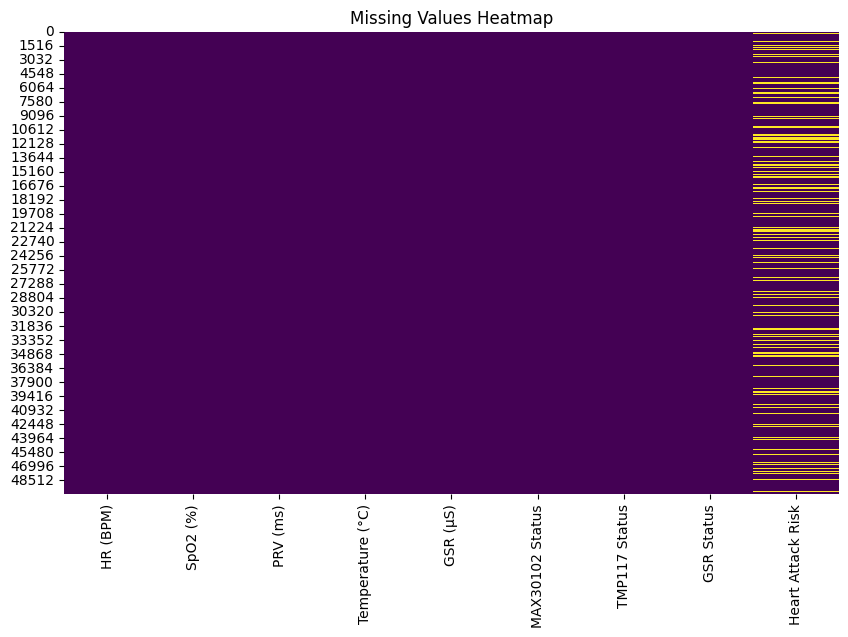

In [66]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [67]:
print("\nDuplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()


Duplicate Rows: 12543


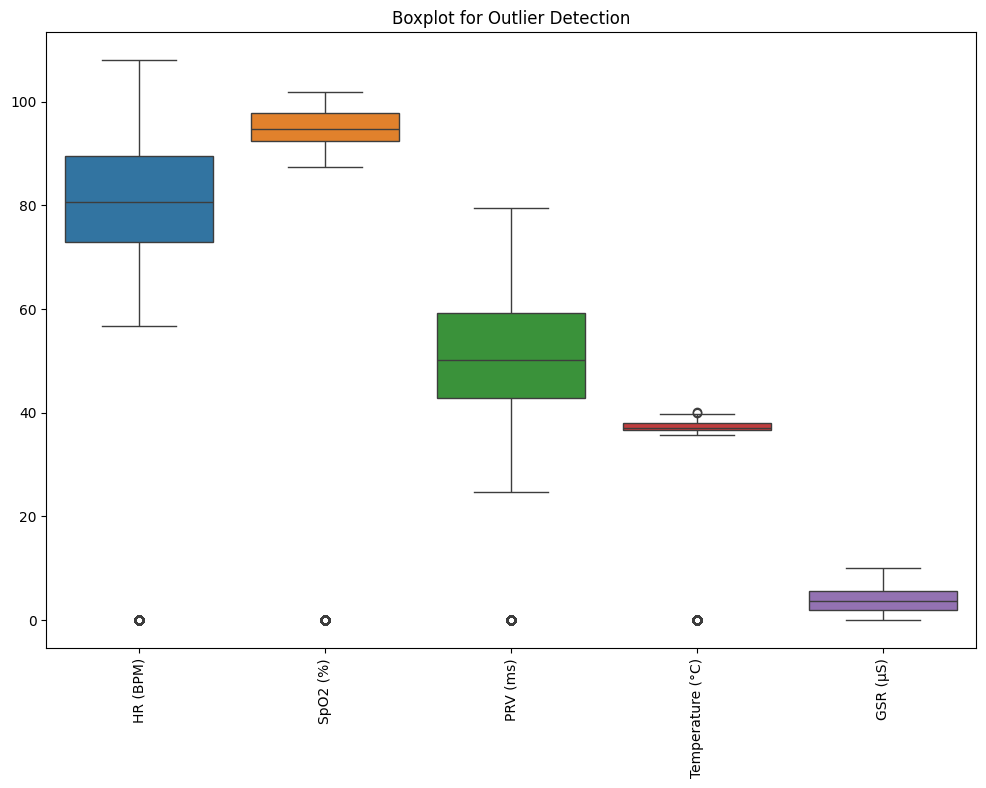

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

In [69]:
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

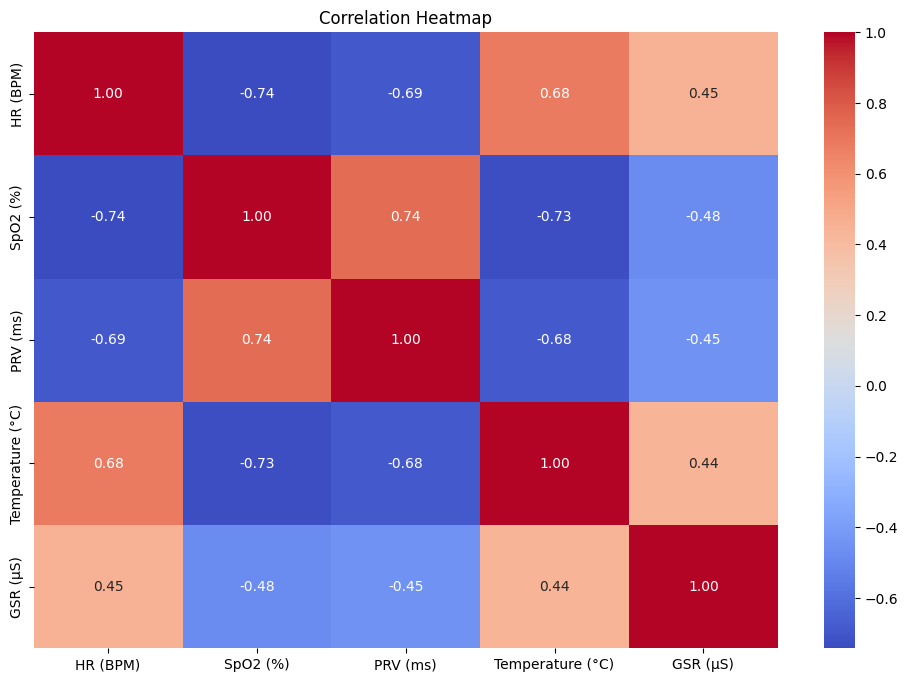

In [70]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Check if there are enough numeric columns
if numeric_data.shape[1] >= 2:
    # Compute correlation and plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data for correlation heatmap.")